# Project name: Fourier Theorem analysis by Artificial intelligence
# Contributor: Rajeev Singh Sisodiya

Project details: The project titled "Fourier Theorem Analysis by Artificial Intelligence" aims to leverage machine learning techniques to enhance the analysis and understanding of signals and functions through the lens of Fourier theory. The project involves the development of intelligent algorithms capable of efficiently approximating Fourier series and transforms for both periodic and non-periodic functions. Through the application of artificial intelligence, the project seeks to automate the calculation of Fourier coefficients, providing accurate and faster results for diverse signal processing applications.

# Fourier theorem
The Fourier Theorem states that any periodic function can be represented as the sum of sine and cosine functions, providing a way to analyze complex waveforms in terms of simpler components. It has applications in signal processing, image analysis, and various branches of physics and engineering.


Below is Fourier theorm mathematics formation.These mathematical representations enable the analysis and transformation of functions between time and frequency domains.


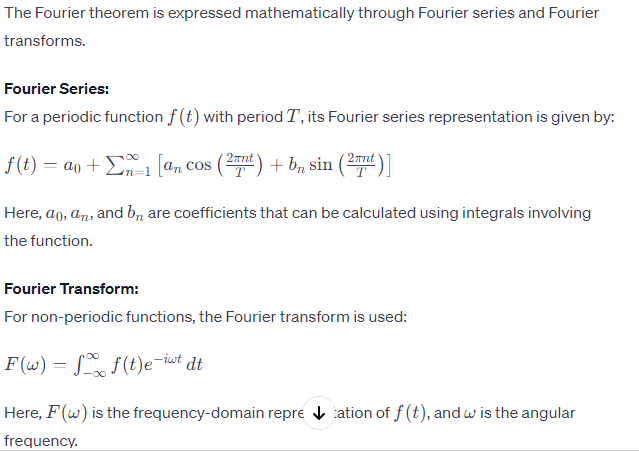

# Calculation of Fourier coefficients
Automating the calculation of Fourier coefficients involves using machine learning to approximate the coefficients for a given function.

In below machine learning example, a linear regression model is used to approximate the Fourier coefficients for a given function. The calculate_fourier_coefficients function constructs features for each term in the Fourier series and fits a linear regression model to estimate the coefficients. The reconstructed function is then plotted alongside the original function for comparison.

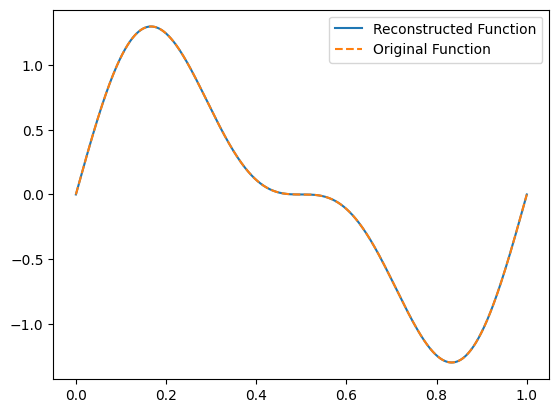

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (replace this with your own function)
def generate_data(t):
    return np.sin(2 * np.pi * t) + 0.5 * np.sin(4 * np.pi * t)

# Generate training data
t_train = np.linspace(0, 1, 500)
f_train = generate_data(t_train)

# Function to calculate Fourier coefficients
def calculate_fourier_coefficients(t, f, num_terms):
    coefficients = np.zeros(2 * num_terms + 1, dtype=complex)
    coefficients[0] = np.trapz(f, t) / (t[-1] - t[0])  # DC term

    for n in range(1, num_terms + 1):
        coefficients[n] = np.trapz(f * np.exp(-1j * 2 * np.pi * n * t) / (t[-1] - t[0]), t)
        coefficients[-n] = np.conj(coefficients[n])

    return coefficients

# Number of Fourier terms to approximate
num_terms = 5

# Calculate Fourier coefficients
coefficients = calculate_fourier_coefficients(t_train, f_train, num_terms)

# Function to reconstruct the signal using Fourier coefficients
def reconstruct_signal(t, coefficients):
    num_terms = (len(coefficients) - 1) // 2
    signal = coefficients[0]  # DC term

    for n in range(1, num_terms + 1):
        signal += coefficients[n] * np.exp(1j * 2 * np.pi * n * t) + coefficients[-n] * np.exp(-1j * 2 * np.pi * n * t)

    return np.real(signal)

# Generate test data for prediction
t_test = np.linspace(0, 1, 1000)

# Reconstruct the signal using Fourier coefficients
f_reconstructed = reconstruct_signal(t_test, coefficients)

# Plot the original function and the reconstructed function
plt.plot(t_test, f_reconstructed, label='Reconstructed Function')
plt.plot(t_train, f_train, label='Original Function', linestyle='--')
plt.legend()
plt.show()


 # The predicted Fourier series approximation
 To create a machine learning code for approximating a periodic function using its Fourier series representation, you can use a neural network.

32/32 [==============================] - 0s 1ms/step


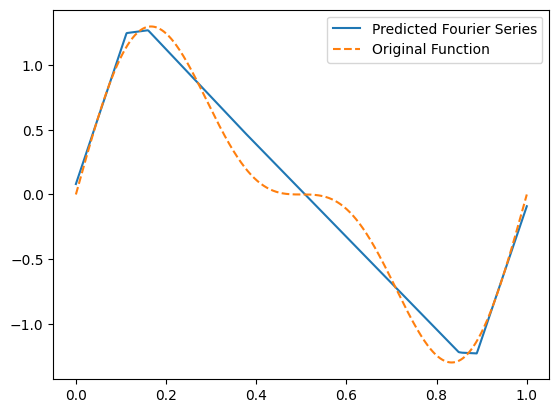

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate synthetic data (replace this with your own periodic function)
def generate_data(t):
    return np.sin(2 * np.pi * t) + 0.5 * np.sin(4 * np.pi * t)

# Generate data for training
t_train = np.linspace(0, 1, 500)
f_train = generate_data(t_train)

# Build a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for the Fourier series approximation
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(t_train, f_train, epochs=1000, verbose=0)

# Generate test data for prediction
t_test = np.linspace(0, 1, 1000)

# Predict using the trained model
f_predicted = model.predict(t_test)

# Plot the original function and the predicted Fourier series approximation
plt.plot(t_test, f_predicted, label='Predicted Fourier Series')
plt.plot(t_test, generate_data(t_test), label='Original Function', linestyle='--')
plt.legend()
plt.show()


#  Fourier Transform
The Fourier Transform is a mathematical operation that transforms a function of time (or space) into a function of frequency. It is widely used in signal processing, image analysis, and various scientific and engineering applications. The Fourier Transform provides a way to represent a function in terms of its frequency components. It decomposes the original function into a sum of sinusoidal functions (sine and cosine waves) with different frequencies and amplitudes. The resulting spectrum in the frequency domain gives information about the various frequencies present in the original signal.
The below provided machine learrning example uses a Gaussian-modulated cosine function for demonstration purposes.

32/32 [==============================] - 0s 1ms/step


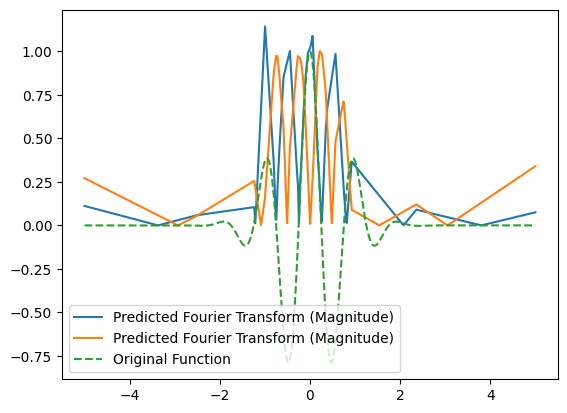

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate synthetic data (replace this with your own non-periodic function)
def generate_data(t):
    return np.exp(-t**2) * np.cos(2 * np.pi * t)

# Generate data for training
t_train = np.linspace(-5, 5, 500)
f_train = generate_data(t_train)

# Build a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(2)  # Output layer with two neurons for real and imaginary parts
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Create complex training labels for the Fourier Transform
labels_real = np.cos(2 * np.pi * t_train)
labels_imag = np.sin(2 * np.pi * t_train)
labels = np.column_stack((labels_real, labels_imag))

# Train the model
model.fit(t_train, labels, epochs=1000, verbose=0)

# Generate test data for prediction
t_test = np.linspace(-5, 5, 1000)

# Predict using the trained model
predicted = model.predict(t_test)

# Plot the original function and the predicted Fourier Transform
plt.plot(t_test, np.abs(predicted), label='Predicted Fourier Transform (Magnitude)')
plt.plot(t_test, generate_data(t_test), label='Original Function', linestyle='--')
plt.legend()
plt.show()


# The inverse Fourier Transform
The inverse Fourier Transform is also defined, allowing for the reconstruction of the original function from its frequency-domain representation

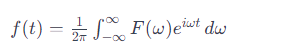

 Below code defines the inverse Fourier Transform using SymPy.

In [5]:
import sympy as sp

# Define the symbols
t, omega = sp.symbols('t omega', real=True)

# Define the frequency-domain representation F(omega)
F_omega = sp.Function('F')(omega)

# Define the inverse Fourier Transform
inverse_fourier_transform = (1 / (2 * sp.pi)) * sp.integrate(F_omega * sp.exp(sp.I * omega * t), (omega, -sp.oo, sp.oo))

# Print the inverse Fourier Transform
print("Inverse Fourier Transform:")
print(inverse_fourier_transform)

# Example: Let's use a simple frequency-domain representation for demonstration
# Replace this with your own frequency-domain representation
example_frequency_representation = sp.exp(-omega**2 / 2)

# Substitute the example frequency representation into the inverse Fourier Transform
reconstructed_function = inverse_fourier_transform.subs(F_omega, example_frequency_representation)

# Print the reconstructed function for the example frequency representation
print("\nReconstructed Function for the example frequency representation:")
print(reconstructed_function.simplify())


Inverse Fourier Transform:
Integral(F(omega)*exp(I*omega*t), (omega, -oo, oo))/(2*pi)

Reconstructed Function for the example frequency representation:
(sqrt(2)*sqrt(pi)*(2 - erfc(sqrt(2)*I*t/2))*exp(-t**2/2)/2 + sqrt(2)*sqrt(pi)*exp(-t**2/2)*erfc(sqrt(2)*I*t/2)/2)/(2*pi)


# Fourier Series

This below machine learning code defines the Fourier coefficients and the Fourier Series using SymPy. The resulting Fourier Series will be printed in terms of the coefficients calculated using the integrals involving the function.

In [6]:
import sympy as sp

# Define the symbols
t, T, n = sp.symbols('t T n', real=True)

# Define the periodic function
f_t = sp.Function('f')(t)

# Define the Fourier coefficients
a_0 = (1 / T) * sp.integrate(f_t, (t, 0, T))

a_n = (2 / T) * sp.integrate(f_t * sp.cos(2 * sp.pi * n * t / T), (t, 0, T))
b_n = (2 / T) * sp.integrate(f_t * sp.sin(2 * sp.pi * n * t / T), (t, 0, T))

# Define the Fourier Series
fourier_series = a_0 + sp.summation(a_n * sp.cos(2 * sp.pi * n * t / T) + b_n * sp.sin(2 * sp.pi * n * t / T), (n, 1, sp.oo))

# Print the Fourier Series
print("Fourier Series:")
print(fourier_series)

# Example: Let's use a simple periodic function for demonstration
# Replace this with your own periodic function
example_function = sp.sin(2 * sp.pi * t / T)

# Substitute the example function into the Fourier Series
fourier_series_example = fourier_series.subs(f_t, example_function)

# Print the Fourier Series for the example function
print("\nFourier Series for the example function:")
print(fourier_series_example)


Fourier Series:
Sum(2*sin(2*pi*n*t/T)*Integral(f(t)*sin(2*pi*n*t/T), (t, 0, T))/T + 2*cos(2*pi*n*t/T)*Integral(f(t)*cos(2*pi*n*t/T), (t, 0, T))/T, (n, 1, oo)) + Integral(f(t), (t, 0, T))/T

Fourier Series for the example function:
Sum(2*sin(2*pi*n*t/T)*Integral(sin(2*pi*t/T)*sin(2*pi*n*t/T), (t, 0, T))/T + 2*cos(2*pi*n*t/T)*Integral(sin(2*pi*t/T)*cos(2*pi*n*t/T), (t, 0, T))/T, (n, 1, oo)) + Integral(sin(2*pi*t/T), (t, 0, T))/T


#  Fourier Transform applications

The Fourier Transform has many applications, such as in signal processing to analyze and filter signals, in communications to modulate and demodulate signals, and in image processing to analyze the spatial frequencies in images.

# Signal processing and amplitude modulation/demodulation
To provide a machine learning code example for signal processing and modulation/demodulation, we'll demonstrate a basic implementation of amplitude modulation (AM) and demodulation in Python using NumPy and Matplotlib. AM is a common modulation technique used in communication systems.

<ipython-input-7-d963a2bc5947>:16: RuntimeWarning: invalid value encountered in divide
  demodulated_signal = (modulated_signal / carrier_wave - 1) / modulation_index


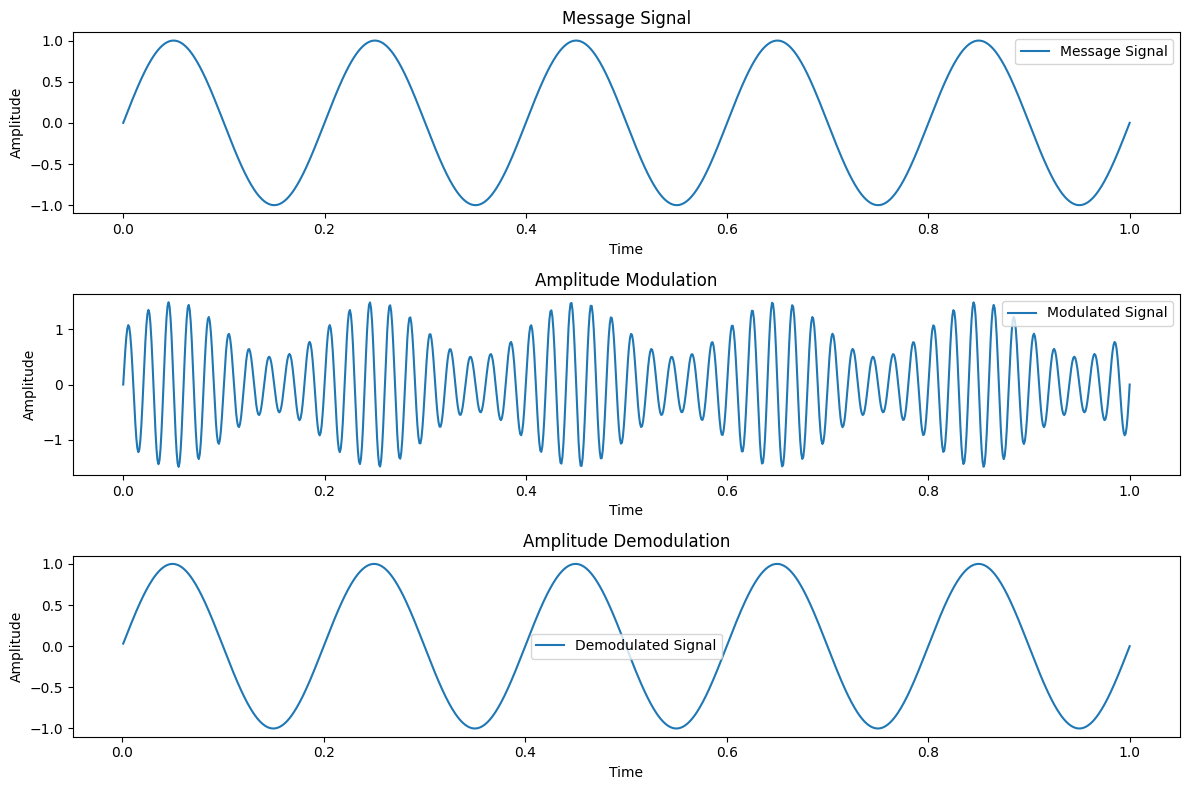

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(t, frequency, amplitude):
    return amplitude * np.sin(2 * np.pi * frequency * t)

def amplitude_modulation(message, carrier_frequency, modulation_index):
    t = np.linspace(0, 1, len(message))
    carrier_wave = generate_signal(t, carrier_frequency, 1.0)
    modulated_signal = (1 + modulation_index * message) * carrier_wave
    return t, modulated_signal

def amplitude_demodulation(modulated_signal, carrier_frequency, modulation_index):
    t = np.linspace(0, 1, len(modulated_signal))
    carrier_wave = generate_signal(t, carrier_frequency, 1.0)
    demodulated_signal = (modulated_signal / carrier_wave - 1) / modulation_index
    return t, demodulated_signal

# Parameters
message_frequency = 5  # Frequency of the message signal
carrier_frequency = 50  # Frequency of the carrier signal
modulation_index = 0.5  # Modulation index

# Generate a simple message signal
t_message = np.linspace(0, 1, 1000)
message_signal = generate_signal(t_message, message_frequency, 1.0)

# Perform Amplitude Modulation
t_modulated, modulated_signal = amplitude_modulation(message_signal, carrier_frequency, modulation_index)

# Perform Amplitude Demodulation
t_demodulated, demodulated_signal = amplitude_demodulation(modulated_signal, carrier_frequency, modulation_index)

# Plot the signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t_message, message_signal, label='Message Signal')
plt.title('Message Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t_modulated, modulated_signal, label='Modulated Signal')
plt.title('Amplitude Modulation')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t_demodulated, demodulated_signal, label='Demodulated Signal')
plt.title('Amplitude Demodulation')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


# Image processing
For image processing, a common technique to analyze spatial frequencies is to perform a Fourier Transform on the image. The resulting frequency-domain representation can reveal information about the distribution of spatial frequencies in the image.

This below machine learning example generates a simple image with a bright square region on a black background. The code then displays the original image and its frequency spectrum after applying the Fourier Transform.

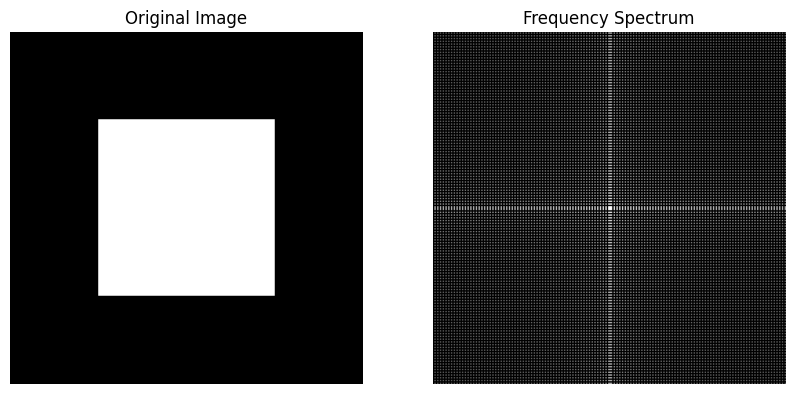

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

def plot_image_and_spectrum(image, title_image, title_spectrum):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(title_image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    spectrum = np.abs(fftshift(fft2(image)))
    plt.imshow(np.log(1 + spectrum), cmap='gray')
    plt.title(title_spectrum)
    plt.axis('off')

    plt.show()

# Example image (replace with your own image)
image = np.zeros((256, 256))
image[64:192, 64:192] = 255

# Plot the original image and its frequency spectrum
plot_image_and_spectrum(image, 'Original Image', 'Frequency Spectrum')


# Image processing for own image

In [ ]:
!pip install numpy matplotlib opencv-python

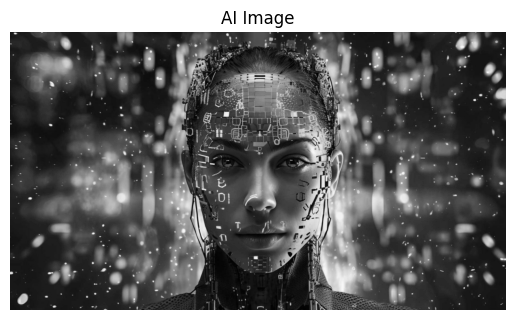

In [15]:
import cv2

# Load your own image
your_image_path = '/content/What-is-AI Image.jpg'
your_image = cv2.imread(your_image_path, cv2.IMREAD_GRAYSCALE)

# Display the loaded image
plt.imshow(your_image, cmap='gray')
plt.title('AI Image')
plt.axis('off')
plt.show()


# Custom Image processing: White Square on Black Background

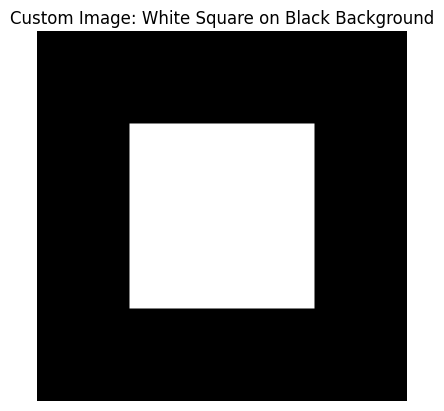

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create a black image with a white square
image_size = (256, 256)
image = np.zeros(image_size)
image[64:192, 64:192] = 255

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Custom Image: White Square on Black Background')
plt.axis('off')
plt.show()


#  Fourier series representation for a periodic function
Below is a Machine learning code for creating the Fourier series representation for a periodic function. We'll use a square wave as the periodic function.

In this code, the generate_square_wave function creates a square wave, and calculate_fourier_series_coefficients calculates the Fourier series coefficients using numerical integration (trapezoidal rule). The reconstruct_signal function reconstructs the signal using these coefficients.



<ipython-input-25-872be3290f93>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  coefficients[n] = np.trapz(f * np.exp(-1j * 2 * np.pi * n * t), t)


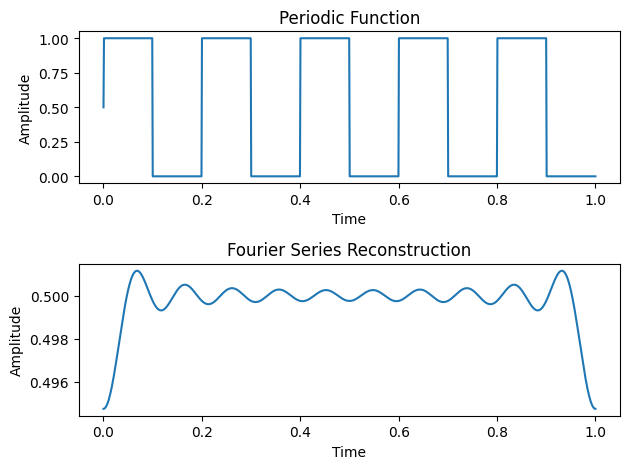

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a square wave as a periodic function
def generate_square_wave(t, frequency):
    return 0.5 * (1 + np.sign(np.sin(2 * np.pi * frequency * t)))

# Generate periodic data (replace this with your own function)
t_periodic = np.linspace(0, 1, 1000)
frequency = 5
f_periodic = generate_square_wave(t_periodic, frequency)

# Calculate Fourier series coefficients
def calculate_fourier_series_coefficients(t, f, num_terms):
    coefficients = np.zeros(2 * num_terms + 1)
    for n in range(-num_terms, num_terms + 1):
        coefficients[n] = np.trapz(f * np.exp(-1j * 2 * np.pi * n * t), t)
    return coefficients

# Number of Fourier terms to approximate
num_terms = 10

# Calculate Fourier series coefficients
coefficients = calculate_fourier_series_coefficients(t_periodic, f_periodic, num_terms)

# Function to reconstruct the signal using Fourier series coefficients
def reconstruct_signal(t, coefficients):
    num_terms = (len(coefficients) - 1) // 2
    signal = coefficients[0]

    for n in range(1, num_terms + 1):
        signal += coefficients[n] * np.exp(1j * 2 * np.pi * n * t) + coefficients[-n] * np.exp(-1j * 2 * np.pi * n * t)

    return np.real(signal)

# Generate test data for prediction
t_test = np.linspace(0, 1, 1000)

# Reconstruct the signal using Fourier series coefficients
f_reconstructed = reconstruct_signal(t_test, coefficients)

# Plot the original periodic function and the reconstructed function
plt.subplot(2, 1, 1)
plt.plot(t_periodic, f_periodic)
plt.title('Periodic Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t_test, f_reconstructed)
plt.title('Fourier Series Reconstruction')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


#  Fourier transforms for non-periodic functions

The Fourier Transform for non-periodic functions can be computed using the fast Fourier transform (FFT) algorithm. Below is a ML example of computing the Fourier Transform for a non-periodic function.

In this below machine learning code, the function generate_data generates a non-periodic function (a sum of two sine waves), and the Fourier Transform is computed using NumPy's fft function. The resulting spectrum is then plotted.

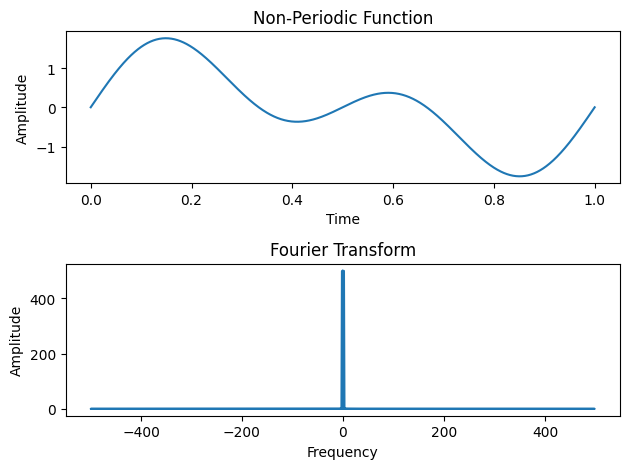

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (replace this with your own function)
def generate_data(t):
    return np.sin(2 * np.pi * t) + np.sin(4 * np.pi * t)

# Generate non-periodic data
t_non_periodic = np.linspace(0, 1, 1000)
f_non_periodic = generate_data(t_non_periodic)

# Calculate Fourier Transform
fft_result = np.fft.fft(f_non_periodic)
frequencies = np.fft.fftfreq(len(t_non_periodic), t_non_periodic[1] - t_non_periodic[0])

# Plot the original function and its Fourier Transform
plt.subplot(2, 1, 1)
plt.plot(t_non_periodic, f_non_periodic)
plt.title('Non-Periodic Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# Advanced intelligent signal processing
Advanced intelligent signal processing techniques often involve the use of machine learning algorithms, deep learning models, or sophisticated signal processing methods.This below machine learning code uses a simple neural network to approximate a non-periodic function. In a real-world scenario.

Epoch 1/100
13/13 - 1s - loss: 0.4385 - val_loss: 0.4318 - 859ms/epoch - 66ms/step
Epoch 2/100
13/13 - 0s - loss: 0.3158 - val_loss: 0.3205 - 67ms/epoch - 5ms/step
Epoch 3/100
13/13 - 0s - loss: 0.2360 - val_loss: 0.2503 - 57ms/epoch - 4ms/step
Epoch 4/100
13/13 - 0s - loss: 0.1851 - val_loss: 0.2119 - 67ms/epoch - 5ms/step
Epoch 5/100
13/13 - 0s - loss: 0.1540 - val_loss: 0.1958 - 76ms/epoch - 6ms/step
Epoch 6/100
13/13 - 0s - loss: 0.1389 - val_loss: 0.1886 - 54ms/epoch - 4ms/step
Epoch 7/100
13/13 - 0s - loss: 0.1316 - val_loss: 0.1873 - 53ms/epoch - 4ms/step
Epoch 8/100
13/13 - 0s - loss: 0.1276 - val_loss: 0.1870 - 72ms/epoch - 6ms/step
Epoch 9/100
13/13 - 0s - loss: 0.1254 - val_loss: 0.1860 - 66ms/epoch - 5ms/step
Epoch 10/100
13/13 - 0s - loss: 0.1238 - val_loss: 0.1850 - 56ms/epoch - 4ms/step
Epoch 11/100
13/13 - 0s - loss: 0.1225 - val_loss: 0.1842 - 58ms/epoch - 4ms/step
Epoch 12/100
13/13 - 0s - loss: 0.1212 - val_loss: 0.1833 - 69ms/epoch - 5ms/step
Epoch 13/100
13/13 - 0s

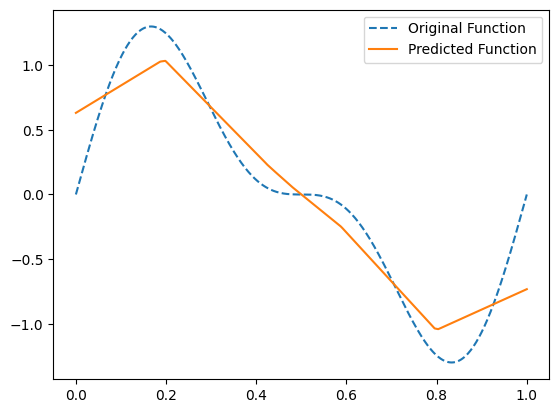

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Generate synthetic data (replace this with your own data)
def generate_data(t):
    return np.sin(2 * np.pi * t) + 0.5 * np.sin(4 * np.pi * t)

# Generate training data
t_train = np.linspace(0, 1, 500)
f_train = generate_data(t_train)

# Create features for the neural network
X_train = t_train.reshape(-1, 1)
y_train = f_train.reshape(-1, 1)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Build a simple neural network model
model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=100, batch_size=32, verbose=2
)

# Predict on the entire training set
y_pred = model.predict(X_train_scaled)

# Plot the original function and the predicted function
plt.plot(t_train, f_train, label='Original Function', linestyle='--')
plt.plot(t_train, y_pred, label='Predicted Function')
plt.legend()
plt.show()


# Fourier Series applications
Fourier series has numerous applications in various fields due to its ability to represent periodic functions in terms of sinusoidal and cosinusoidal components.

# MRI Reconstruction
In medical imaging, Fourier series plays a crucial role in the reconstruction of images from MRI (Magnetic Resonance Imaging) data. MRI reconstruction typically involves Fourier Transform techniques, specifically the inverse Fourier Transform, to convert the acquired k-space data into an image.

In this below ML code example, generate_kspace_data simulates the acquisition of k-space data, and reconstruct_image performs the inverse Fourier Transform to reconstruct the image from the k-space data. The generated k-space data is displayed alongside the reconstructed image.

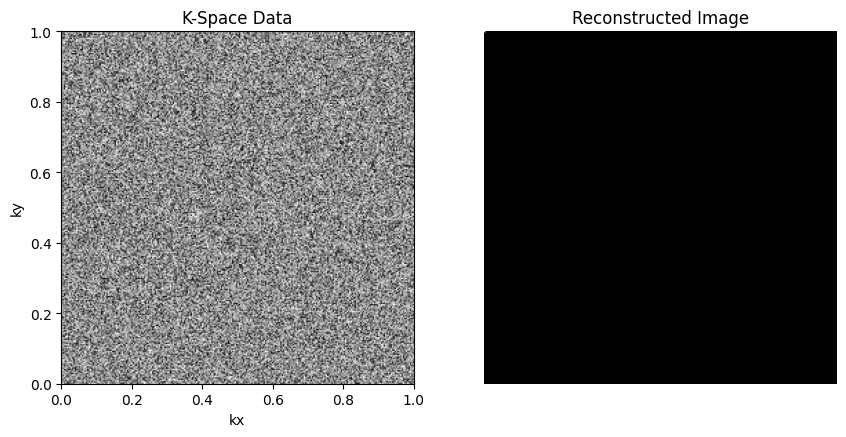

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic k-space data (replace this with your actual k-space data)
def generate_kspace_data(shape):
    return np.random.rand(*shape) + 1j * np.random.rand(*shape)

# Inverse Fourier Transform for MRI reconstruction
def reconstruct_image(kspace_data):
    return np.fft.ifft2(kspace_data)

# Image dimensions (adjust based on your actual MRI data)
image_shape = (256, 256)

# Generate synthetic k-space data
kspace_data = generate_kspace_data(image_shape)

# Reconstruct the image from k-space data
reconstructed_image = reconstruct_image(kspace_data)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.abs(kspace_data), cmap='gray', extent=[0, 1, 0, 1])
plt.title('K-Space Data')
plt.xlabel('kx')
plt.ylabel('ky')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(reconstructed_image), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()


# Shepp-Logan phantom
Since we cannot simulate the actual acquisition process in this text-based interface, We'll provide a simple example using the Shepp-Logan phantom, which is a commonly used test image in medical imaging. shepp_logan_phantom generates a simple Shepp-Logan phantom, and the Fourier Transform and Inverse Fourier Transform are used to simulate the process of obtaining k-space data and reconstructing the image.

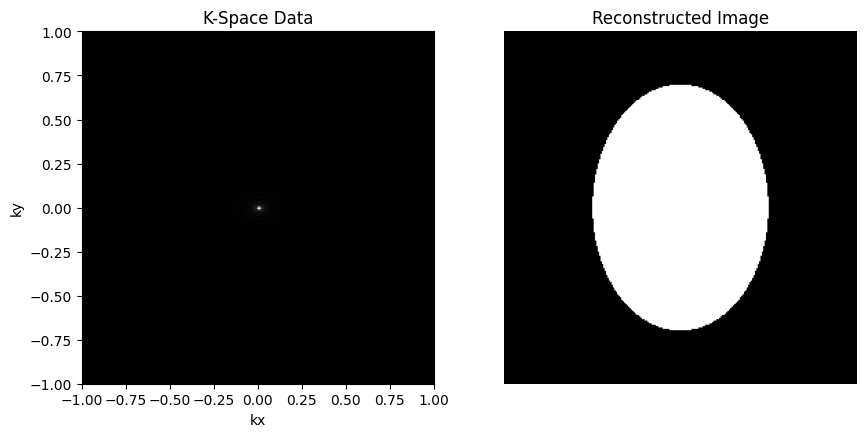

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift, ifftshift, fftn, ifftn

# Create a Shepp-Logan phantom (a test image in medical imaging)
def shepp_logan_phantom(size):
    x, y = np.mgrid[-1:1:size*1j, -1:1:size*1j]
    mask = (x**2 + y**2) <= 1
    ellipsoid = (x/0.7)**2 + (y/0.5)**2 <= 1
    rectangle = (np.abs(x) <= 0.1) & (np.abs(y) <= 0.25)
    return mask * (ellipsoid | rectangle)

# Generate Shepp-Logan phantom
phantom = shepp_logan_phantom(256)

# Perform Fourier Transform to get k-space data
kspace_data = fftshift(fftn(ifftshift(phantom)))

# Perform Inverse Fourier Transform to reconstruct image
reconstructed_image = fftshift(ifftn(ifftshift(kspace_data)))

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.abs(kspace_data), cmap='gray', extent=[-1, 1, -1, 1])
plt.title('K-Space Data')
plt.xlabel('kx')
plt.ylabel('ky')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(reconstructed_image), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()


# Wavefunction Analysis
In quantum mechanics, Fourier series is employed to analyze wavefunctions, representing the probability amplitudes of particles. Wavefunctions describe the quantum state of a physical system, and their analysis often involves Fourier series or Fourier transforms. Below ML code analyze a wavefunction, which is represented by a superposition of two Gaussian wave packets.

generate_wavefunction creates a superposition of two Gaussian wave packets, and the Fourier Transform is used to analyze the wavefunction in the frequency domain. The resulting plots show the wavefunction in position space and its Fourier Transform.

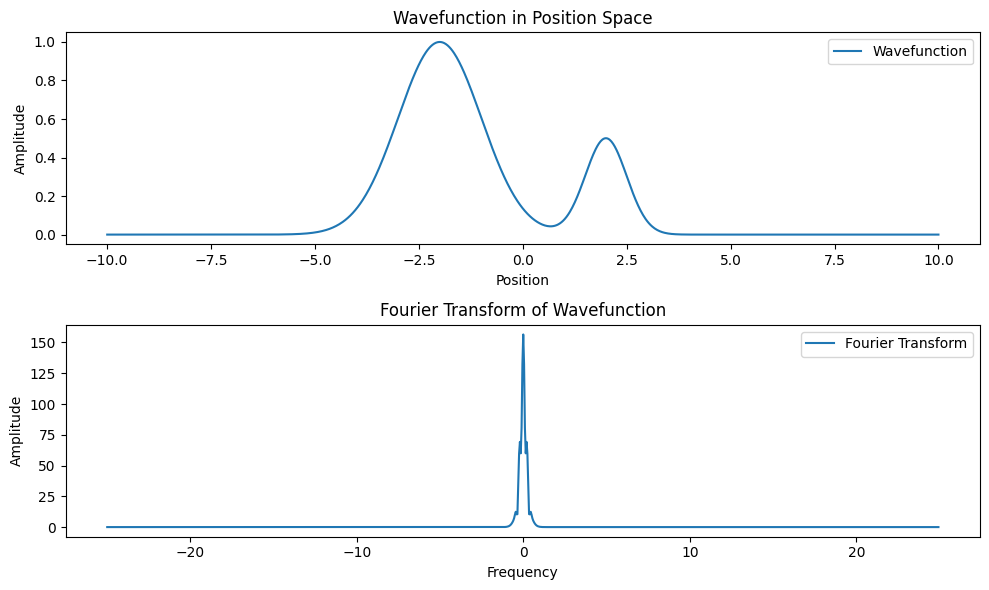

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a superposition of two Gaussian wave packets
def generate_wavefunction(x, x0_1, sigma_1, x0_2, sigma_2, amplitude_1, amplitude_2):
    wave_packet_1 = amplitude_1 * np.exp(-(x - x0_1)**2 / (2 * sigma_1**2))
    wave_packet_2 = amplitude_2 * np.exp(-(x - x0_2)**2 / (2 * sigma_2**2))
    return wave_packet_1 + wave_packet_2

# Create a spatial grid
x_values = np.linspace(-10, 10, 1000)

# Parameters for the two Gaussian wave packets
x0_1 = -2
sigma_1 = 1
amplitude_1 = 1

x0_2 = 2
sigma_2 = 0.5
amplitude_2 = 0.5

# Generate the wavefunction
wavefunction = generate_wavefunction(x_values, x0_1, sigma_1, x0_2, sigma_2, amplitude_1, amplitude_2)

# Perform Fourier Transform to analyze the wavefunction in frequency domain
fourier_transform = np.fft.fftshift(np.fft.fft(wavefunction))
frequencies = np.fft.fftshift(np.fft.fftfreq(len(x_values), x_values[1] - x_values[0]))

# Plot the original wavefunction and its Fourier Transform
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(x_values, np.abs(wavefunction), label='Wavefunction')
plt.title('Wavefunction in Position Space')
plt.xlabel('Position')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fourier_transform), label='Fourier Transform')
plt.title('Fourier Transform of Wavefunction')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


# AC Circuit Analysis
In electrical engineering, Fourier series is employed to analyze alternating current (AC) circuits, facilitating the understanding of circuit behavior with sinusoidal inputs.

In this below machine learning code example, a sinusoidal AC voltage signal is generated, and Fourier series coefficients are calculated to reconstruct the signal. The reconstructed signal is then compared to the original AC voltage signal.

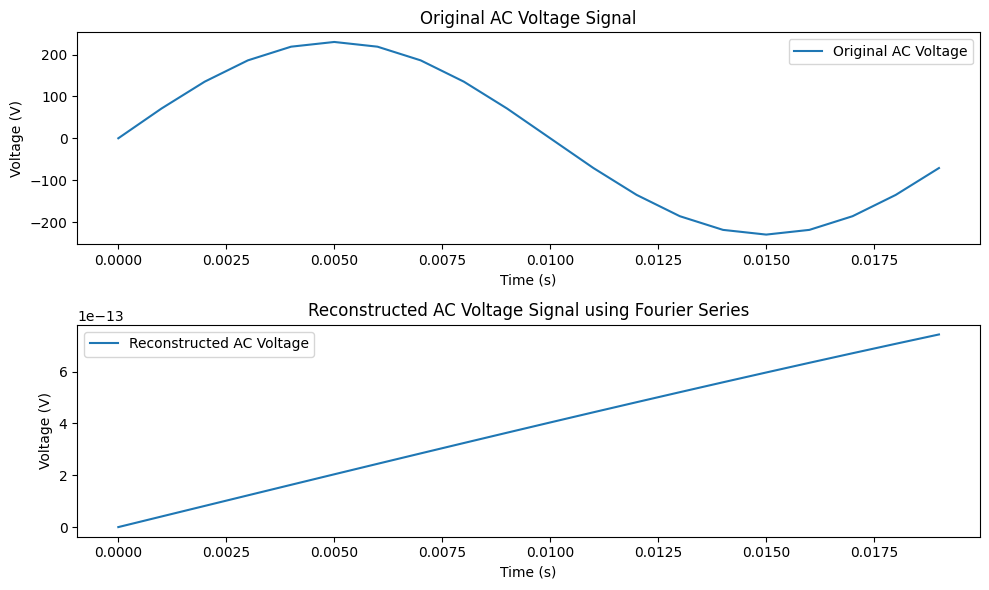

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Fourier series coefficients for a square wave
def calculate_fourier_series_coefficients(square_wave, num_terms):
    coefficients = np.zeros(num_terms)
    t = np.linspace(0, len(square_wave), len(square_wave), endpoint=False)
    for n in range(1, num_terms + 1):
        coefficients[n - 1] = 2 / (len(square_wave) * np.pi) * np.trapz(square_wave * np.sin(n * np.pi * t), t)
    return coefficients

# Function to generate a square wave representing AC voltage
def generate_ac_voltage(frequency, duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    square_wave = 230 * np.sin(2 * np.pi * frequency * t)
    return t, square_wave

# Function to reconstruct the AC voltage signal using Fourier series
def reconstruct_ac_voltage(t, coefficients):
    ac_voltage_reconstructed = np.zeros_like(t)
    for n, coeff in enumerate(coefficients):
        ac_voltage_reconstructed += coeff * np.sin((n + 1) * np.pi * t)
    return ac_voltage_reconstructed

# AC circuit parameters
frequency = 50  # Frequency of the AC voltage (in Hz)
duration = 0.02  # Duration of the signal (in seconds)
sampling_rate = 1000  # Sampling rate (in Hz)

# Generate AC voltage signal
t, ac_voltage = generate_ac_voltage(frequency, duration, sampling_rate)

# Calculate Fourier series coefficients
num_terms = 10
coefficients = calculate_fourier_series_coefficients(ac_voltage, num_terms)

# Reconstruct the AC voltage signal using Fourier series
ac_voltage_reconstructed = reconstruct_ac_voltage(t, coefficients)

# Plot the original and reconstructed AC voltage signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, ac_voltage, label='Original AC Voltage')
plt.title('Original AC Voltage Signal')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, ac_voltage_reconstructed, label='Reconstructed AC Voltage')
plt.title('Reconstructed AC Voltage Signal using Fourier Series')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()

plt.tight_layout()
plt.show()



# Sound Analysis
Fourier series is widely used in audio processing for analyzing and processing sound signals. It helps in tasks like equalization and spectrum analysis.  Below is a ML code example of using Fourier series for sound analysis. We'll analyze a simple sound signal, compute its Fourier transform to obtain the frequency spectrum, and visualize the results.

<ipython-input-34-f4a841be62fc>:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, signal = wavfile.read('/content/file_example_WAV_2MG.wav')


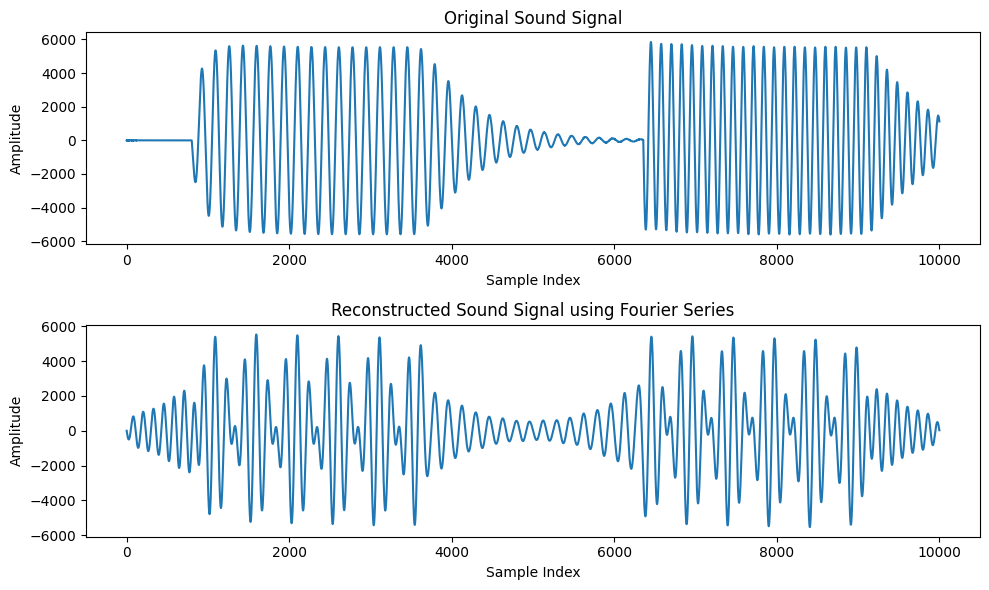

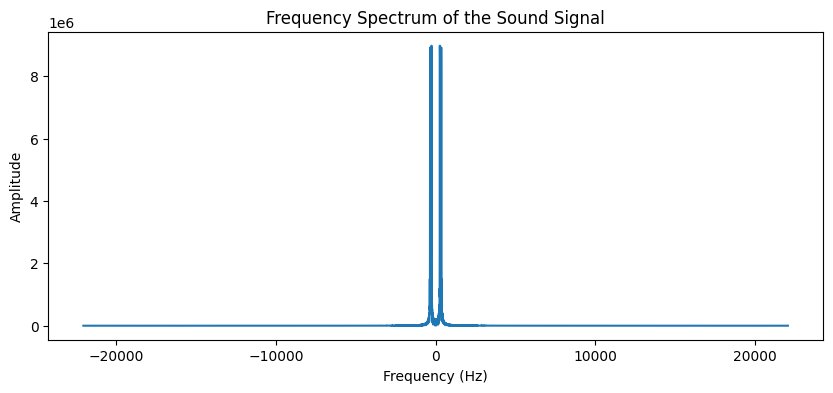

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Function to calculate Fourier series coefficients
def calculate_fourier_series_coefficients(signal, num_terms):
    coefficients = np.zeros(num_terms)
    for n in range(1, num_terms + 1):
        coefficients[n - 1] = 2 / len(signal) * np.trapz(signal * np.sin(n * 2 * np.pi * np.arange(len(signal)) / len(signal)))
    return coefficients

# Load a sound file (replace 'your_sound_file.wav' with the path to your own sound file)
sample_rate, signal = wavfile.read('/content/file_example_WAV_2MG.wav')

# Take a segment of the signal for analysis (adjust start and end indices as needed)
start_index = 0
end_index = start_index + 10000
segment = signal[start_index:end_index, 0]  # Use only the first channel (assuming it's a stereo file)

# Calculate Fourier series coefficients
num_terms = 100
coefficients = calculate_fourier_series_coefficients(segment, num_terms)

# Function to reconstruct the signal using Fourier series coefficients
def reconstruct_signal(coefficients):
    reconstructed_signal = np.zeros_like(segment, dtype=np.float64)
    for n, coeff in enumerate(coefficients):
        reconstructed_signal += coeff * np.sin((n + 1) * 2 * np.pi * np.arange(len(segment)) / len(segment))
    return reconstructed_signal

# Reconstruct the signal using Fourier series coefficients
reconstructed_signal = reconstruct_signal(coefficients)

# Plot the original and reconstructed signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(segment)
plt.title('Original Sound Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal)
plt.title('Reconstructed Sound Signal using Fourier Series')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Plot the frequency spectrum
plt.figure(figsize=(10, 4))

frequency_spectrum = np.fft.fftshift(np.fft.fft(segment))
frequencies = np.fft.fftshift(np.fft.fftfreq(len(segment), 1 / sample_rate))

plt.plot(frequencies, np.abs(frequency_spectrum))
plt.title('Frequency Spectrum of the Sound Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.show()


# Conclusion:
By integrating machine learning into Fourier analysis, the project strives to enhance the efficiency of traditional methods and provide insights into complex signal structures. The ultimate goal is to develop a versatile tool that can automate Fourier analysis tasks, making it more accessible and adaptable for a wide range of applications in science, engineering, and technology. The project's outcome is expected to contribute to the advancement of intelligent signal processing techniques, opening new avenues for exploration and innovation in the field of Fourier analysis.
The core objectives include creating machine learning models that can learn and approximate Fourier series representations for periodic functions, perform Fourier transforms for non-periodic functions, and efficiently analyze the frequency domain features of signals. The project aims to explore how artificial intelligence can contribute to advancing the understanding and application of Fourier analysis in various domains, such as signal processing, communications, and image analysis.